# Text Extraction

Dataset ini merupakan kumpulan data review pelanggan terkait handphone yang dikumpulkan secara manual dari platform shopee dan tokopedia. Terdapat beberapa proses yang dilakukan seperti <b>Pengumpulan Dataset</b>, <b>Data Preprocessing</b>, <b>TF-IDF Processing</b> dan <b>Distance calculation</b>.

## Daftar Isi
* [Preprocessing](##Preprocessing)
    * [Import Library](###Import-Library)
    * [Load Dataset](###Load-Data)
    * [Case Folding](###Case-Folding)
    * [Preprocessing Function](###Preprocessing-Function)

#
* [TF-IDF](##Term-Frequency-Inverse-Document-Frequency) 
    * [Compute Function](#bagian_2_1)
    * [Result](#bagian_2_2)
    * [Evaluation](#bagian_2_2)
#
* [Save Feature To CSV](##Save-TF-IDF-Feature-To-CSV)
* [Evaluation Precision](###Evaluation-(Precision))
* [Euclidean](##Euclidean-Distance)
* [Cosine Similarity](##Cosine-Similarity)

## Preprocessing

### Import Library

---

**Padas** = digunakan untuk manipulasi dan analisis data tabular, seperti spreadsheet <br/>
**math** = berisi fungsi matematika <br/>
**matplotlib.pyplot** = digunakan untuk membuat visulisasi grafik dan plot dta <br/>
**numpy** = digunakan untuk komputasi numberik dan bekerja dengan array dan matriks <br/>
**nltk.corpus import stopwords** = mengimpor modul stopwords dari pustaka Natural Language Toolkit (NLTK). NLTK adalah pustaka yang digunakan untuk pemrosesan bahasa alami. stopwords adalah kata-kata umum yang sering dihapus dalam analisis teks karena mereka tidak membawa banyak informasi. <br/>
**Sastrawi.Stemmer.StemmerFactory import StemmerFactory** = mengimpor pustaka Sastrawi, yang digunakan untuk melakukan stemming dalam bahasa Indonesia. Stemming adalah proses mengubah kata-kata menjadi bentuk dasar atau kata dasar mereka.




In [96]:
import pandas as pd
import math
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory


### Load Data

membaca data dari file CSV "review_handphone4.csv" ke dalam sebuah DataFrame dan kemudian menampilkan 10 baris pertama dari DataFrame tersebut sebagai output. 

In [97]:
review_handphone = pd.read_csv('./review_handphone4.csv')

# print(review_handphone.columns)
review_handphone.head(10)

,label,review
0,positif,Layar handphone ini sangat impresif dengan res...
1,positif,Fitur kamera depan dengan mode potret yang dis...
2,positif,Kecepatan prosesor yang tinggi pada handphone...
3,positif,Baterai handphone ini memiliki kapasitas yang ...
4,positif,Keamanan handphone ini sangat baik berkat peng...
5,positif,Handphone ini memiliki fitur pengisian daya ni...
6,positif,Suara dari speaker stereo pada handphone ini ...
7,positif,Desain fisik handphone ini sangat elegan dan r...
8,positif,Antarmuka pengguna yang intuitif membuat navig...
9,positif,Sinyal jaringan seluler pada handphone ini san...


### Case Folding

kode berikut digunakan digunakan untuk mengubah semua teks dalam kolom "label" dan "review" DataFrame review_handphone menjadi huruf kecil (lowercase) menggunakan perulangan "for".

In [98]:
for i in range(len(review_handphone)):
  review_handphone['label'][i] = review_handphone['label'][i].lower()
  review_handphone['review'][i] = review_handphone['review'][i].lower()

In [99]:
review_handphone['review']

0     layar handphone ini sangat impresif dengan res...
1     fitur kamera depan dengan mode potret yang dis...
2      kecepatan prosesor yang tinggi pada handphone...
3     baterai handphone ini memiliki kapasitas yang ...
4     keamanan handphone ini sangat baik berkat peng...
                            ...                        
72    chargernya bermasalah, pengisian baterai sanga...
73    baru saja saya membuka kotaknya, tapi saya tid...
74    saya tidak dapat menggunakan dua kartu, satu k...
75    katanya ada garansi, tetapi masalah dengan sen...
76    kualitas hp ini sangat buruk; meskipun masih b...
Name: review, Length: 77, dtype: object

In [100]:
# !pip install Sastrawi

In [101]:
# import nltk
# nltk.download("book")

fungsi 'ganti_isi_column' ini bertujuan untuk mengganti isi dari 'data_lama' dengan isi dari 'data_baru'

In [102]:
def ganti_isi_column(data_lama,data_baru):
  for i in range(len(data_lama)) :
    data_lama[i] = data_baru[i]
  print(data_lama)

### Preprocessing Function

Kode berikut digunakan untuk memberisikan dan memproses teks dalam 'document_to_be_scored' dengan beberapa langkah, seperti tokenisasi, penghapusan stopwords, dan stemming menggunakan pustaka Sastrawi. 
- Tokenisasi adalah proses membagi teks menjadi unit-unit yang lebih kecil, seperti kata-kata atau frasa, yang disebut sebagai "token."
- Stopwords adalah kata-kata yang umumnya dianggap tidak memiliki makna yang signifikan dalam analisis teks dan sering dihapus.
- Stemming adalah proses mengubah kata-kata ke bentuk dasarnya atau kata dasar.

In [103]:
def preprocessing(document_to_be_scored):
  # Tokenize Dataset
  pisah = {}
  for i in range(len(document_to_be_scored)):
    pisah[i] = document_to_be_scored[i].split() #melakukan split

  # Menghilangkan stopword memakai library nltk
  stopword=['dengan'] # custom list stopword

  removed = {}
  hasil = []
  listStopword = stopwords.words('indonesian') # list stopword dari NLTK

  # Tambahkan stopword
  for i in stopword:
    listStopword.append(i)
  print(listStopword,"\n")

  # listStopword = set(stopwords.words('indonesian')) #list stopword
  hitung = 0 #untuk menghitung frekuensi
  for i in pisah.values():
    for j in i:
      if j not in listStopword: #jika setiap kata tidak ada di list stopword
        hasil.append(j)
    removed[hitung] = hasil[:]
    del hasil[:]
    hitung=hitung+1

  # Memakai library sastarawi
  # Memakai library sastrawi untuk melakukan stemming
  factory = StemmerFactory() #membuat objek stemmer
  stemmer = factory.create_stemmer()
  hitung = 0

  hasil=[]
  hasil2 = {}

  for i in removed.values():
    for j in i:
      # Hasil Stemming
      hasil.append(stemmer.stem(j))
    hasil2[hitung] = hasil[:]
    del hasil[:]
    hitung = hitung+1
  hasil =""
  korpus2 =[]
  for i in hasil2.values():
    hasil =""
    for j in i:
      hasil = hasil+ " " +j
    korpus2.append(hasil)
  #Timpa hasil
  ganti_isi_column(document_to_be_scored,korpus2)



In [104]:
preprocessing(review_handphone['review'])

['ada', 'adalah', 'adanya', 'adapun', 'agak', 'agaknya', 'agar', 'akan', 'akankah', 'akhir', 'akhiri', 'akhirnya', 'aku', 'akulah', 'amat', 'amatlah', 'anda', 'andalah', 'antar', 'antara', 'antaranya', 'apa', 'apaan', 'apabila', 'apakah', 'apalagi', 'apatah', 'artinya', 'asal', 'asalkan', 'atas', 'atau', 'ataukah', 'ataupun', 'awal', 'awalnya', 'bagai', 'bagaikan', 'bagaimana', 'bagaimanakah', 'bagaimanapun', 'bagi', 'bagian', 'bahkan', 'bahwa', 'bahwasanya', 'baik', 'bakal', 'bakalan', 'balik', 'banyak', 'bapak', 'baru', 'bawah', 'beberapa', 'begini', 'beginian', 'beginikah', 'beginilah', 'begitu', 'begitukah', 'begitulah', 'begitupun', 'bekerja', 'belakang', 'belakangan', 'belum', 'belumlah', 'benar', 'benarkah', 'benarlah', 'berada', 'berakhir', 'berakhirlah', 'berakhirnya', 'berapa', 'berapakah', 'berapalah', 'berapapun', 'berarti', 'berawal', 'berbagai', 'berdatangan', 'beri', 'berikan', 'berikut', 'berikutnya', 'berjumlah', 'berkali-kali', 'berkata', 'berkehendak', 'berkeinginan'

0      layar handphone impresif resolusi warna hidup...
1      fitur kamera mode potret sempurna guna ambil ...
2      cepat prosesor handphone multitasking lancar ...
3      baterai handphone milik kapasitas besar guna ...
4      aman handphone berkat kenal wajah pindai sidi...
                            ...                        
72     chargernya masalah isi baterai lambat kadang ...
73     buka kotak pasang kartu sim tolong produk cac...
74     kartu kartu deteksi sekali kecewa pergi konte...
75     garansi senter nyala jelas jelas beli hp ini ...
76     kualitas hp buruk baru alami rusa layar buram...
Name: review, Length: 77, dtype: object


In [105]:
review_handphone['review']

0      layar handphone impresif resolusi warna hidup...
1      fitur kamera mode potret sempurna guna ambil ...
2      cepat prosesor handphone multitasking lancar ...
3      baterai handphone milik kapasitas besar guna ...
4      aman handphone berkat kenal wajah pindai sidi...
                            ...                        
72     chargernya masalah isi baterai lambat kadang ...
73     buka kotak pasang kartu sim tolong produk cac...
74     kartu kartu deteksi sekali kecewa pergi konte...
75     garansi senter nyala jelas jelas beli hp ini ...
76     kualitas hp buruk baru alami rusa layar buram...
Name: review, Length: 77, dtype: object

## Term Frequency-Inverse Document Frequency

TF-IDF adalah teknik yang digunakan dalam pemrosesan bahasa alami dan pengelolaan informasi untuk mengukur pentingnya sebuah kata dalam konteks koleksi dokumen. Berikut adalah langkah-langkahnya
- Fungsi tokenize(document) digunakan untuk memecah dokumen menjadi token-token. Ini dilakukan dengan mengubah teks menjadi huruf kecil (lowercase) dan kemudian memisahkan teks berdasarkan spasi.
- sebuah set vocabulary yang akan digunakan untuk menyimpan seluruh kata unik yang muncul dalam koleksi dokumen.
- mengurutkan seluruh kata dalam vocabulary
- Menghitung TF (Term Frequency)
- Menghitung IDF (Inverse Document Frequency)
- Menghitung TF-IDF
- Fungsi compute_tfidf mengembalikan empat nilai: vocabulary (kosa kata), tf_matrix (matriks TF), idf (nilai IDF), dan tfidf_matrix (matriks TF-IDF).


In [106]:
def compute_tfidf(documents):
    # Step 1: Tokenization
    def tokenize(document):
        return document.lower().split()

    # Step 2: Create a vocabulary
    vocabulary = set()
    for doc in documents:
        vocabulary.update(tokenize(doc))

    vocabulary = sorted(vocabulary)

    # Step 3: Compute TF (Term Frequency)
    print("\nIterasi pada setiap data:")
    count=1
    tf_matrix = []
    for doc in documents:
        tokens = tokenize(doc)
        tf = [tokens.count(word) for word in vocabulary]
        print("Data Ke-",count,":",tokens)
        tf_matrix.append(tf)
        count+=1


    # Step 4: Compute IDF (Inverse Document Frequency)
    idf = []
    N = len(documents)
    for word in vocabulary:
        doc_count = sum([1 for doc in documents if word in tokenize(doc)])
        idf.append(math.log(N / (1 + doc_count)))


    # Step 5: Compute TF-IDF
    tfidf_matrix = []
    for tf_vector in tf_matrix:
        tfidf = [tf * idf_value for tf, idf_value in zip(tf_vector, idf)]
        tfidf_matrix.append(tfidf)
    
    return vocabulary, tf_matrix, idf, tfidf_matrix

In [107]:
documents = review_handphone['review']

vocabulary,tf_matrix,idf,tfidf_matrix = compute_tfidf(documents)

print("\nVocabulary: ",vocabulary)

print("\nTF Matrix:")
for i in range(len(documents)): print(tf_matrix[i])

print("\nInverse Document Frequency:")
for i in range(len(documents)): print(idf[i])

# Print the TF-IDF matrix
print("\nTF-IDF:")
for i, doc in enumerate(documents):
    print(f"TF-IDF Vector for Document {i+1}: {tfidf_matrix[i]}")



Iterasi pada setiap data:
Data Ke- 1 : ['layar', 'handphone', 'impresif', 'resolusi', 'warna', 'hidup', 'alam', 'tonton', 'video', 'main', 'game', 'mikat']
Data Ke- 2 : ['fitur', 'kamera', 'mode', 'potret', 'sempurna', 'guna', 'ambil', 'foto', 'selfie', 'tajam', 'kualitas']
Data Ke- 3 : ['cepat', 'prosesor', 'handphone', 'multitasking', 'lancar', 'kerja', 'responsif', 'jalan', 'aplikasi', 'berat']
Data Ke- 4 : ['baterai', 'handphone', 'milik', 'kapasitas', 'besar', 'guna', 'perangkat', 'isi', 'daya']
Data Ke- 5 : ['aman', 'handphone', 'berkat', 'kenal', 'wajah', 'pindai', 'sidik', 'jari', 'cepat', 'jadi', 'aman', 'simpan', 'data', 'sensitif']
Data Ke- 6 : ['handphone', 'milik', 'fitur', 'isi', 'daya', 'nirkabel', 'nyaman', 'repot', 'kabel', 'isi', 'daya']
Data Ke- 7 : ['suara', 'speaker', 'stereo', 'handphone', 'jernih', 'imbang', 'alam', 'dengar', 'musik']
Data Ke- 8 : ['desain', 'fisik', 'handphone', 'elegan', 'ramping', 'bingkai', 'tipis', 'jadi', 'mudah', 'genggam']
Data Ke- 9 : [

## Save TF-IDF Feature to CSV

kode berikut adalah implementasi untuk menyimpan matriks TF-IDF ke dalam sebuah file CSV.

In [108]:
import math
import csv

csv_file_path = 'tfidf_features.csv'

# Save the TF-IDF matrix to a CSV file
with open(csv_file_path, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)

    # Write the header row (vocabulary)
    writer.writerow(vocabulary)

    # Write each TF-IDF vector as a row
    for tfidf_vector in tfidf_matrix:
        writer.writerow(tfidf_vector)

print(f'TF-IDF features saved to {csv_file_path}')


TF-IDF features saved to tfidf_features.csv


### Evaluation (Precision)

In [109]:
def precision(positive,negative,label_document_1):
    print("Nilai positif prediksi  = ",positive)
    print("Nilai negative prediksi = ",negative)

    if(label_document_1 == 'positive'):
        precision = positive/limit
        print('Precision = {}/{} = {}'.format(positive,limit,precision))
    else:
        precision = negative/limit
        print('Precision = {}/{} = {}'.format(negative,limit,precision))
    return precision

## Euclidean Distance

Euclidean distance (jarak Euclidean) adalah metrik atau ukuran jarak yang paling umum digunakan dalam geometri. Ini mengukur jarak antara dua titik dalam ruang Euclidean tiga dimensi atau lebih. Semakin kecil nilai jarak Euclidean antara dua titik, semakin dekat atau mirip kedua titik tersebut. langkah sebagai berikut:
- pada kode dibawah digunakan index 23 sebagai refrensi untuk mengukur kemiripan
- selanjutnya dihitung jarak euclidean antara dua vektor yaitu index 23 dan setiap data dari hasil tfidf
- data dengan nilai euclidean terkecil akan di urutkan dan ditampilkan dari yang terkecil
- function precision() digunakan untuk menghitung presisi berdasarkan dokumen positif atau negatif yang dicetak. Presisi diukur sebagai jumlah dokumen positif atau negatif yang dicetak dibagi oleh limit.

Hasil dari kode ini adalah mencari dan mencetak dokumen-dokumen yang paling mirip dengan dokumen referensi (dengan batasan limit) berdasarkan jarak Euclidean. Presisi mengukur sejauh mana dokumen yang dicetak benar-benar relevan dengan dokumen referensi.



In [110]:
import pandas as pd
import numpy as np

index_document = 23

# Baca file CSV yang berisi fitur TF-IDF
df = pd.read_csv('tfidf_features.csv')

# Pilih kolom yang berisi vektor TF-IDF, misalnya 'tfidf_vector'
tfidf_matrix = tfidf_matrix = df.iloc[::] 

# Fungsi untuk menghitung Euclidean Distance antara dua vektor
def euclidean_distance(vector1, vector2):
    return np.linalg.norm(vector1 - vector2)

# Hitung kemiripan dokumen 1 dengan dokumen lainnya
document_1 = tfidf_matrix.iloc[index_document]  # Ganti dengan indeks dokumen yang ingin Anda bandingkan
label_document_1 = review_handphone['label'][index_document]
print(review_handphone['review'][index_document])

#digunakan untuk menyimpan hasil perhitungan jarak Euclidean antara dokumen referensi dan dokumen-dokumen lainnya.
similarities = []

for i in range(1, len(tfidf_matrix)):
    document_i = tfidf_matrix.iloc[i]
    distance = euclidean_distance(document_1, document_i)
    similarities.append((i, distance))

# Sort hasil kemiripan berdasarkan jarak (semakin kecil semakin mirip)
similarities.sort(key=lambda x: x[1])

# Tampilkan dokumen yang paling mirip dengan dokumen pertama
count = 0
limit = 15
positive =0
negative =0
for i, distance in similarities:
    print(f"Dokumen {i}: \nEuclidean Distance = {distance}")
    print("Label           : ",review_handphone['label'][i])
    print("Review          :",review_handphone['review'][i])

    print("\n")
    if (count==limit): break
    else: count+=1

    if(review_handphone['label'][i] == 'positif'):
        positive+=1
    else:
        negative+=1    

print("\033[1m" + "Euclidean Distance" + "\033[0m")
print("Label Dokumen Uji = ",label_document_1)
print("Precision = {}".format(precision(positive,negative,label_document_1)))


 baterai handphone milik daya tahan lama hari penuh khawatir habis daya
Dokumen 23: 
Euclidean Distance = 0.0
Label           :  positif
Review          :  baterai handphone milik daya tahan lama hari penuh khawatir habis daya


Dokumen 67: 
Euclidean Distance = 8.461856851032245
Label           :  negatif
Review          :  handphone milik serius daya tahan baterai baterai cepat habis guna normal hari


Dokumen 43: 
Euclidean Distance = 9.606694531118114
Label           :  negatif
Review          :  baterai handphone cepat habis guna wajar


Dokumen 46: 
Euclidean Distance = 10.06809522425853
Label           :  negatif
Review          :  rekomendasi handphone


Dokumen 3: 
Euclidean Distance = 10.144730203725537
Label           :  positif
Review          :  baterai handphone milik kapasitas besar guna perangkat isi daya


Dokumen 50: 
Euclidean Distance = 10.397691221024614
Label           :  negatif
Review          :  harga handphone kualitas fitur tawar


Dokumen 20: 
Euclidean Dist

## Cosine Similarity

Cosine similarity mengukur sudut antara dua vektor dalam ruang berdimensi banyak, dan bukan jarak antara dua vektor. Semakin kecil sudut antara vektor-vektor tersebut, semakin mirip atau mendekati satu (kemiripan sempurna) nilainya.

In [111]:
#masukkan input
# query =''
# query = input('masukkan query: ')
df = pd.read_csv('review_handphone4.csv')
query = df['review'][index_document]
label_document_1 = df['label'][index_document]
print(query)

Baterai handphone ini memiliki daya tahan yang lama, sehingga dapat digunakan seharian penuh tanpa khawatir kehabisan daya.


Hasil dari kode dibawah adalah teks dalam variabel 'query' yang telah dibersihkan dari bentuk kata-kata yang bervariasi dan telah diubah menjadi bentuk dasarnya menggunakan stemming. 

In [112]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory() #membuat objek stemmer
stemmer = factory.create_stemmer()
query =stemmer.stem(query)

Fungsi compute_cosine_similarity digunakan untuk mengukur sejauh mana dua teks serupa dalam hal konten. Semakin tinggi nilai kemiripan kosinus, semakin serupa kedua teks tersebut. Nilai akan berada dalam rentang [0, 1], di mana 0 menunjukkan ketidakmiripan dan 1 menunjukkan kemiripan sempurna.

In [113]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Mengembalikan nilai cosine similarity dari dua teks yang diberikan
def compute_cosine_similarity(text1, text2):

    # list
    list_text = [text1, text2]

    # converts text into vectors with the TF-IDF
    vectorizer = TfidfVectorizer()
    vectorizer.fit_transform(list_text)
    tfidf_text1, tfidf_text2 = vectorizer.transform([list_text[0]]), vectorizer.transform([list_text[1]])

    # computes the cosine similarity
    cs_score = cosine_similarity(tfidf_text1, tfidf_text2)

    return np.round(cs_score[0][0],5)

Kode dibawah akan mencari dan menampilkan dokumen-dokumen yang paling relevan dengan teks query berdasarkan nilai kemiripan kosinus (cosine similarity) antara query dan ulasan-ulasan handphone dalam review_handphone. 

In [114]:
similarity = {}
i =0

for doc in review_handphone['review']: #similarities antara input dan review
  similarity[i]= compute_cosine_similarity(query,doc)
  i = i+1
output = sorted(similarity.items(), key=lambda x:x[1], reverse=True)
print(output)
print("menampilkan 5 Data paling relevan (nilai cosine similiarity tertinggi) dengan "+ "\'" +query+"\'")
i =0
count = 0
limit = 15
positive =0
negative =0
for k, v in output:
  #jika nilai scoring dibawah 0.01 skip
  if v < 0.01 :continue 
  if(i >= limit): break
  try:
    similarity = "{:.5f}".format(v)
    print("Pada record ke ",str(k))
    print("Nilai similaritas : ", similarity)
    print("Label             : ", review_handphone['label'][k])
    print("Review            :", review_handphone['review'][k])
    print("\n")

    if(review_handphone['label'][k] == 'positif'):
        positive+=1
    else:
        negative+=1    

  except:
    continue
  i=i+1

print("\033[1m" + "Cosine Similarity" + "\033[0m")
print("Label Dokumen Uji = ",label_document_1)
precision(positive,negative,label_document_1)

[(23, 0.72325), (67, 0.4695), (3, 0.30637), (43, 0.24462), (5, 0.21861), (20, 0.1707), (21, 0.15215), (22, 0.1478), (8, 0.12251), (31, 0.10808), (46, 0.09589), (24, 0.09009), (47, 0.08428), (71, 0.08428), (9, 0.06883), (37, 0.06463), (44, 0.06285), (58, 0.06004), (45, 0.05544), (50, 0.05544), (38, 0.04937), (41, 0.04614), (42, 0.04614), (15, 0.0459), (30, 0.04355), (6, 0.04035), (2, 0.03817), (7, 0.03817), (69, 0.03817), (70, 0.03817), (1, 0.03631), (68, 0.03631), (28, 0.03516), (0, 0.03469), (56, 0.0309), (36, 0.03054), (4, 0.02988), (75, 0.02988), (17, 0.02792), (72, 0.02538), (74, 0.02481), (10, 0.02427), (18, 0.02427), (60, 0.0233), (13, 0.02286), (52, 0.02244), (16, 0.02033), (64, 0.01872), (35, 0.01105), (11, 0.0), (12, 0.0), (14, 0.0), (19, 0.0), (25, 0.0), (26, 0.0), (27, 0.0), (29, 0.0), (32, 0.0), (33, 0.0), (34, 0.0), (39, 0.0), (40, 0.0), (48, 0.0), (49, 0.0), (51, 0.0), (53, 0.0), (54, 0.0), (55, 0.0), (57, 0.0), (59, 0.0), (61, 0.0), (62, 0.0), (63, 0.0), (65, 0.0), (66, 

0.4

## Analisis Performa

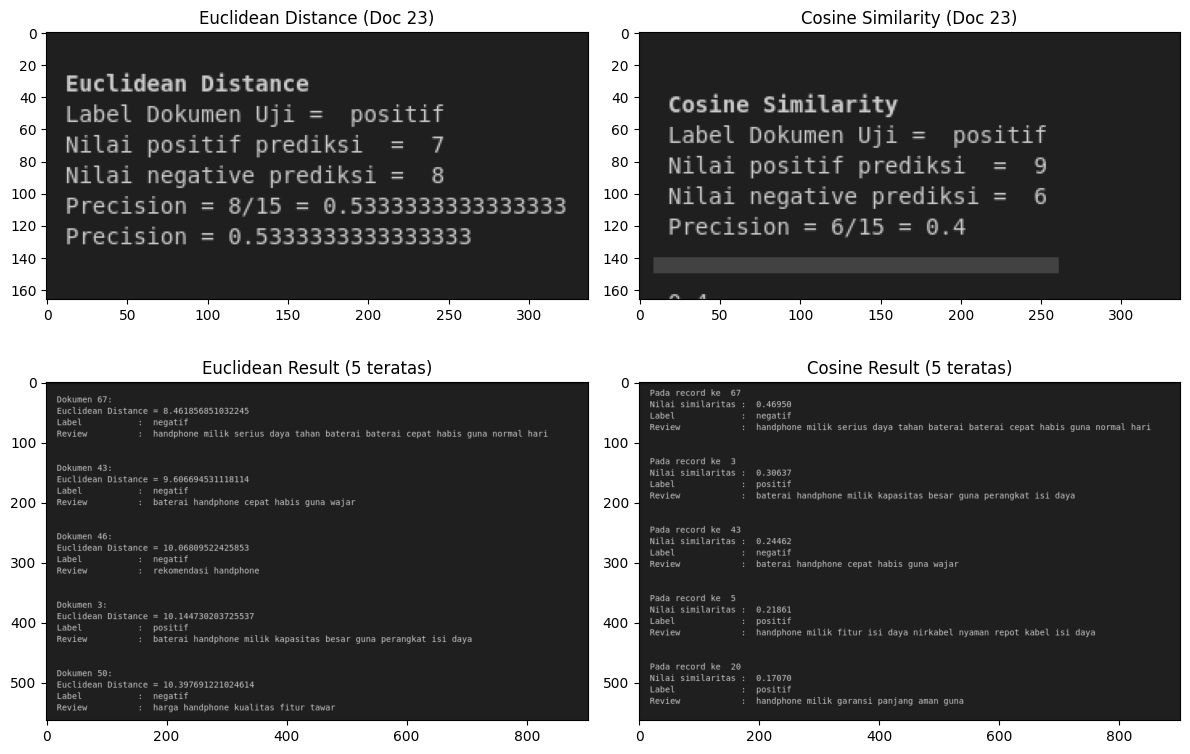

In [115]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Baca empat gambar yang ingin ditampilkan
gambar1 = mpimg.imread('./Euclidean_Distance.png')
gambar2 = mpimg.imread('./Cosine_Similarity.png')
gambar3 = mpimg.imread('./Euclidean_result.png')
gambar4 = mpimg.imread('./Cosine_Result.png')

# Buat plot dengan empat subplot secara bersebelahan
plt.figure(figsize=(12, 8))  # Atur ukuran figur

# Subplot pertama (kiri atas)
plt.subplot(2, 2, 1)  # 2 baris, 2 kolom, subplot pertama
plt.imshow(gambar1)
plt.title('Euclidean Distance (Doc 23)')

# Subplot kedua (kanan atas)
plt.subplot(2, 2, 2)  # 2 baris, 2 kolom, subplot kedua
plt.imshow(gambar2)
plt.title('Cosine Similarity (Doc 23)')

# Subplot ketiga (kiri bawah)
plt.subplot(2, 2, 3)  # 2 baris, 2 kolom, subplot ketiga
plt.imshow(gambar3)
plt.title('Euclidean Result (5 teratas)')

# Subplot keempat (kanan bawah)
plt.subplot(2, 2, 4)  # 2 baris, 2 kolom, subplot keempat
plt.imshow(gambar4)
plt.title('Cosine Result (5 teratas)')

# Atur jarak antara subplot
plt.tight_layout()

# Tampilkan plot
plt.show()


Dari visualisasi di atas, dapat dilihat bahwa <b>Euclidean Distance</b> memiliki <b>precision</b> yang <b>lebih tinggi</b> jika dibandingkan dengan Cosine Similarity.
#
Namun, jika dilihat dari 5 data teratas, cosine similarity memiliki 3 nilai positif, dimana nilai ini sama dengan class/label dari data input yang diinginkan. Sedangkan pada Euclidean Distance hanya memiliki 1 nilai positif.

<b>Sehingga dapat disimpulkan walaupun Cosine Similarity memiliki nilai presisi yang relatif lebih rendah, nilai prediksi kelas yang dihasilkan lebih sesuai ketimbang hasil dari Euclidean Distance</b>